In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [5]:
all_file= glob.glob("../Data/*.xlsx")
len(all_file)

20

In [6]:
all_file

['../Data/random_name11.xlsx',
 '../Data/random_name6.xlsx',
 '../Data/random_name8.xlsx',
 '../Data/random_name16.xlsx',
 '../Data/random_name19.xlsx',
 '../Data/random_name2.xlsx',
 '../Data/random_name15.xlsx',
 '../Data/random_name4.xlsx',
 '../Data/random_name17.xlsx',
 '../Data/random_name7.xlsx',
 '../Data/random_name13.xlsx',
 '../Data/random_name1.xlsx',
 '../Data/random_name9.xlsx',
 '../Data/random_name3.xlsx',
 '../Data/random_name14.xlsx',
 '../Data/random_name12.xlsx',
 '../Data/random_name5.xlsx',
 '../Data/random_name10.xlsx',
 '../Data/random_name18.xlsx',
 '../Data/random_name20.xlsx']

In [60]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['idx'].iloc[4])
    
    
    data.append(temp)
    
cluster_ids =clusters
names

['random_name11',
 'random_name6',
 'random_name8',
 'random_name16',
 'random_name19',
 'random_name2',
 'random_name15',
 'random_name4',
 'random_name17',
 'random_name7',
 'random_name13',
 'random_name1',
 'random_name9',
 'random_name3',
 'random_name14',
 'random_name12',
 'random_name5',
 'random_name10',
 'random_name18',
 'random_name20']

In [59]:
data = pd.concat(data)
data = data.sample(frac = 1)

In [43]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [44]:
data['content'] = data['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [45]:
X_train, X_test, y_train, y_test =  train_test_split(data['content'], data['idx'], test_size=0.33, random_state=42 )

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['idx'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss = 'modified_huber', penalty='l2', max_iter=100)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

Cross Accuracy: 0.44 (+/- 0.01)


In [53]:
joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [54]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.44 (+/- 0.01)
              precision    recall  f1-score   support

           1       0.37      0.28      0.32       351
           2       0.65      0.49      0.56       365
           3       0.29      0.42      0.34       330
           4       0.35      0.35      0.35       340
           5       0.39      0.33      0.36       350
           6       0.41      0.34      0.37       310
           7       0.58      0.61      0.59       326
           8       0.39      0.47      0.43       304
           9       0.52      0.22      0.31       347
          10       0.48      0.70      0.57       326
          11       0.47      0.50      0.49       327
          12       0.92      0.94      0.93       323
          13       0.95      0.92      0.93       327
          14       0.33      0.35      0.34       285
          15       0.30      0.44      0.35       325
          16       0.45      0.44      0.44       323
          17       0.65      0.47      0.54      

In [55]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

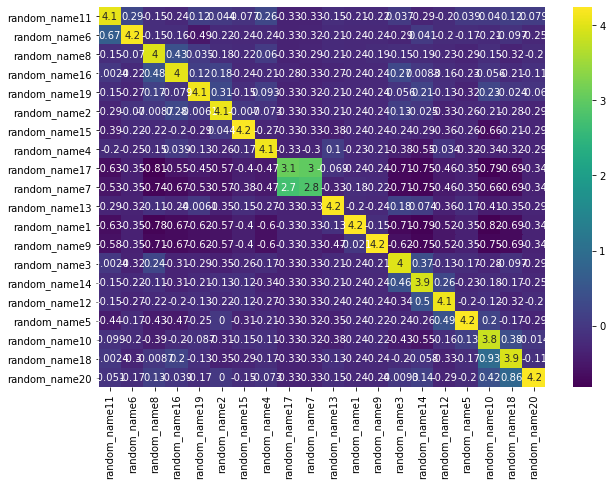

In [61]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')